In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
consumption = pd.read_csv('../../Data/Fish/fish-and-seafood-consumption-per-capita.csv')
production = pd.read_csv('../../Data/Fish/fish-seafood-production.csv')
population = pd.read_csv('../../Data/Fish/population.csv')

In [4]:
consumption

,Entity,Code,Year,Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita
0,Afghanistan,AFG,1961,0.030559
1,Afghanistan,AFG,1962,0.030578
2,Afghanistan,AFG,1963,0.030598
3,Afghanistan,AFG,1964,0.030614
4,Afghanistan,AFG,1965,0.030627
...,...,...,...,...
12355,Zimbabwe,ZWE,2016,3.679239
12356,Zimbabwe,ZWE,2017,3.397224
12357,Zimbabwe,ZWE,2018,3.117559
12358,Zimbabwe,ZWE,2019,2.870986


In [5]:
production

,Entity,Code,Year,Fish and seafood | 00002960 || Production | 005511 || tonnes
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0
...,...,...,...,...
12550,Zimbabwe,ZWE,2016,25800.0
12551,Zimbabwe,ZWE,2017,26800.0
12552,Zimbabwe,ZWE,2018,32300.0
12553,Zimbabwe,ZWE,2019,29230.0


In [6]:
production = production.rename(columns={'Fish and seafood | 00002960 || Production | 005511 || tonnes': 'Production_in_tons'})


In [7]:
production

,Entity,Code,Year,Production_in_tons
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0
...,...,...,...,...
12550,Zimbabwe,ZWE,2016,25800.0
12551,Zimbabwe,ZWE,2017,26800.0
12552,Zimbabwe,ZWE,2018,32300.0
12553,Zimbabwe,ZWE,2019,29230.0


In [8]:
population = population[population['Year'] > 1960].reset_index(drop=True)

In [9]:
population

,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,1961,8790140
1,Afghanistan,AFG,1962,8969055
2,Afghanistan,AFG,1963,9157463
3,Afghanistan,AFG,1964,9355510
4,Afghanistan,AFG,1965,9565154
...,...,...,...,...
15787,Zimbabwe,ZWE,2017,14751101
15788,Zimbabwe,ZWE,2018,15052191
15789,Zimbabwe,ZWE,2019,15354606
15790,Zimbabwe,ZWE,2020,15669663


In [10]:
columns_to_merge = ['Year', 'Code', 'Production_in_tons']

temp = consumption.merge(production[columns_to_merge], on=['Year', 'Code'])


In [11]:
temp2 = temp.rename(columns={'Fish and seafood | 00002960 || Food available for consumption | 0645pc || kilograms per year per capita': 'kg_per_yr_per_capita'})

In [12]:
to_add = ['Code', 'Year','Population (historical estimates)', 'Entity']
merged_df = temp2.merge(population[to_add], on=['Code', 'Year', 'Entity'])



In [13]:
merged_df

,Entity,Code,Year,kg_per_yr_per_capita,Production_in_tons,Population (historical estimates)
0,Afghanistan,AFG,1961,0.030559,300.0,8790140
1,Afghanistan,AFG,1962,0.030578,300.0,8969055
2,Afghanistan,AFG,1963,0.030598,300.0,9157463
3,Afghanistan,AFG,1964,0.030614,300.0,9355510
4,Afghanistan,AFG,1965,0.030627,300.0,9565154
...,...,...,...,...,...,...
38107,Zimbabwe,ZWE,2016,3.679239,25800.0,14452705
38108,Zimbabwe,ZWE,2017,3.397224,26800.0,14751101
38109,Zimbabwe,ZWE,2018,3.117559,32300.0,15052191
38110,Zimbabwe,ZWE,2019,2.870986,29230.0,15354606


In [14]:
USA_df = merged_df[merged_df['Code'] == 'USA']

Kg consumption vs Production (tons) correlation coeff: 0.9522772160699255
Population vs kg consumption correlation coeff: 0.8548251047554055
Population vs Production (tons) coeff: 0.7933311508655229


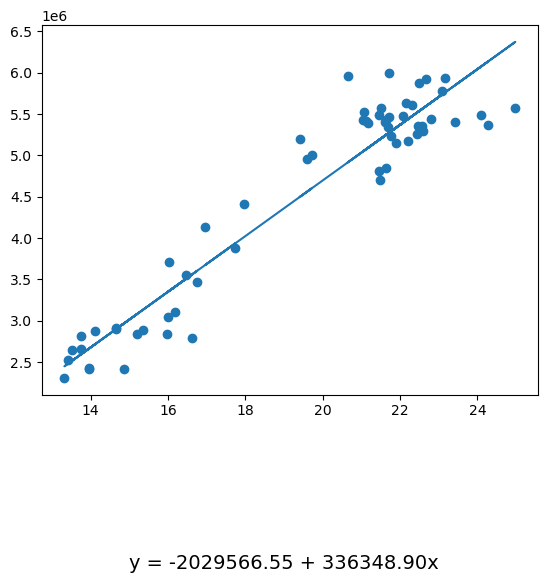

In [51]:
x=USA_df['kg_per_yr_per_capita']
y=USA_df['Production_in_tons']

plt.scatter(x=x, y=y)
a, b=np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.text(15, 12, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14);

print(f"Kg consumption vs Production (tons) correlation coeff: {USA_df['kg_per_yr_per_capita'].corr(USA_df['Production_in_tons'])}")
print(f"Population vs kg consumption correlation coeff: {USA_df['Population (historical estimates)'].corr(USA_df['kg_per_yr_per_capita'])}")
print(f"Population vs Production (tons) coeff: {USA_df['Population (historical estimates)'].corr(USA_df['Production_in_tons'])}")

## Combining Number of employees and above data into one df

In [78]:
emp_df = pd.read_csv(r"C:\Users\JesseNoss\Desktop\Capstone\Data\Fish\Employment\IPUAN11251W010000000.csv")
emp_df['Employment #'] = pd.to_numeric(emp_df['Employment #'])
emp_df_yr = emp_df[:-2]
USA_df_yr = USA_df[26:]
combined_df = USA_df_yr
combined_df['Num_employees'] = list(emp_df_yr['Employment #'])
print(emp_df_yr.shape, USA_df_yr.shape, combined_df.shape);

(34, 3) (34, 7) (34, 7)


C:\Users\JesseNoss\AppData\Local\Temp\ipykernel_6308\1167379823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Num_employees'] = list(emp_df_yr['Employment #'])


In [75]:
print(f"Kg consumption vs Num Employed correlation coeff: {combined_df['kg_per_yr_per_capita'].corr(combined_df['Num_employees'])}")
print(f"Population vs Num Employed correlation coeff: {combined_df['Population (historical estimates)'].corr(combined_df['Num_employees'])}")
print(f"Num Employed vs Production (tons) correlation coeff: {combined_df['Num_employees'].corr(combined_df['Production_in_tons'])}")

Kg consumption vs Num Employed correlation coeff: 0.028388993363903853
Population vs Num Employed correlation coeff: 0.7745168971491696
Num Employed vs Production (tons) correlation coeff: -0.6760026591059473


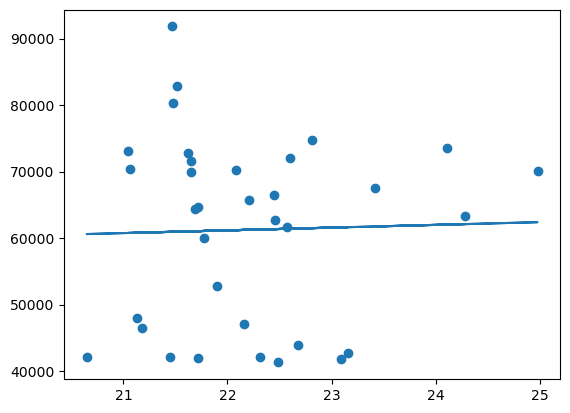

In [79]:
y1=combined_df['Num_employees']
x1 = combined_df['kg_per_yr_per_capita']
plt.scatter(x=x1, y=y1)
a, b=np.polyfit(x1, y1, 1)
plt.plot(x1, a*x1+b)

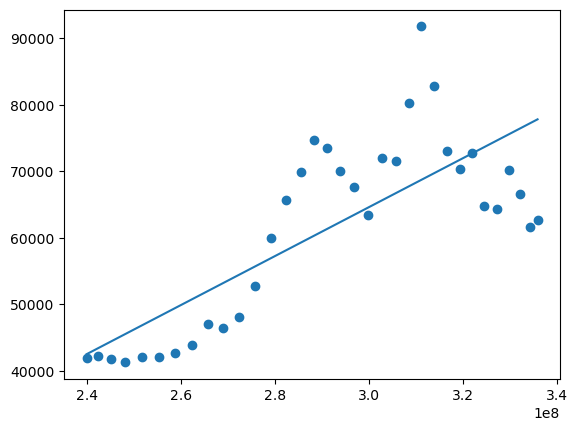

In [80]:
y1=combined_df['Num_employees']
x2 = combined_df['Population (historical estimates)']
plt.scatter(x=x2, y=y1)
a, b=np.polyfit(x2, y1, 1)
plt.plot(x2, a*x2+b)